In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./Wine_red.csv",sep=';')
df = pd.get_dummies(df)
print(df.shape)
df.head(3)

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [3]:
df = (df - df.mean()) / df.std()

# PVE

PC1     0.260097
PC2     0.186824
PC3     0.140243
PC4     0.101252
PC5     0.081105
PC6     0.055216
PC7     0.051526
PC8     0.042156
PC9     0.034276
PC10    0.027327
PC11    0.015018
PC12    0.004960
dtype: float64


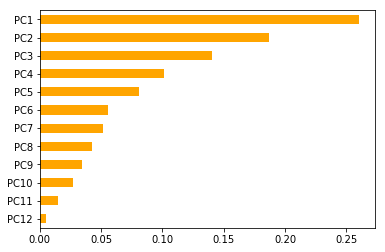

In [4]:
n_comp = df.shape[1]
cols = ['PC'+str(i+1) for i in range(n_comp)]
pca = PCA(n_components=n_comp)
pca.fit(df)
PVE = pd.Series(pca.explained_variance_ratio_, index=cols)
print(PVE)
PVE.sort_values().plot.barh(color='orange')

In [5]:
PVE.sum()

1.0000000000000002

In [6]:
df_loadings = pd.DataFrame(pca.components_,columns= df.columns, index=cols)
print(df_loadings.shape)
df_loadings.round(2)

(12, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
PC1,0.49,-0.27,0.47,0.14,0.20,-0.05,0.00,0.37,-0.43,0.25,-0.07,0.11
PC2,-0.00,0.34,-0.14,0.17,0.19,0.26,0.36,0.33,-0.07,-0.11,-0.50,-0.47
PC3,-0.16,-0.23,0.10,0.24,-0.03,0.62,0.54,-0.17,0.07,0.21,0.22,0.22
PC4,-0.23,0.04,-0.06,-0.38,0.65,-0.03,-0.03,-0.20,-0.01,0.56,-0.09,-0.04
PC5,-0.08,0.30,-0.12,0.71,0.27,-0.16,-0.22,0.21,0.26,0.21,0.26,0.14
PC6,0.06,0.30,0.14,0.11,0.34,-0.04,0.12,-0.43,-0.48,-0.40,0.39,-0.14
PC7,-0.31,-0.63,0.24,0.28,0.23,-0.14,-0.11,-0.12,0.19,-0.23,-0.12,-0.41
PC8,0.20,0.15,0.30,-0.17,-0.19,-0.02,0.09,0.08,0.31,0.28,0.47,-0.61
PC9,-0.17,-0.06,-0.22,0.28,-0.42,-0.32,0.12,-0.25,-0.46,0.45,-0.10,-0.24
PC10,-0.18,0.16,0.35,-0.05,-0.00,-0.59,0.59,0.04,0.21,-0.07,-0.11,0.26


In [7]:
df_scores = pd.DataFrame(pca.transform(df),columns=cols)
print(df_scores.shape)
df_scores.round(2)

(1599, 12)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.78,1.16,-1.39,-0.04,0.23,-0.98,-0.11,0.04,-0.29,0.07,-0.26,0.05
1,-1.00,2.07,0.01,0.47,0.18,0.66,-1.38,-0.18,0.59,-0.57,0.05,-0.14
2,-0.92,1.39,-0.70,0.35,0.10,0.25,-0.72,-0.09,0.55,-0.16,-0.20,-0.12
3,2.40,-0.21,0.07,-0.89,-1.52,-0.13,0.20,-0.20,-0.51,0.24,-0.11,0.32
4,-1.78,1.16,-1.39,-0.04,0.23,-0.98,-0.11,0.04,-0.29,0.07,-0.26,0.05
5,-1.74,1.18,-1.14,-0.05,0.04,-1.05,-0.04,0.04,-0.33,0.04,-0.37,0.04
6,-1.25,1.14,-0.77,-0.38,-1.04,0.12,-0.03,-0.42,0.14,0.00,-0.40,0.11
7,-2.06,-1.02,-0.61,-0.10,-0.42,-0.08,-1.02,-1.70,-0.59,-0.00,0.18,0.36
8,-0.93,-0.65,-1.01,-0.14,0.19,-0.86,-0.81,-1.83,-0.27,0.19,-0.13,0.13
9,0.53,1.30,1.70,-0.79,1.52,-0.22,0.89,0.67,1.32,0.82,-0.04,0.02


# Bi Plot

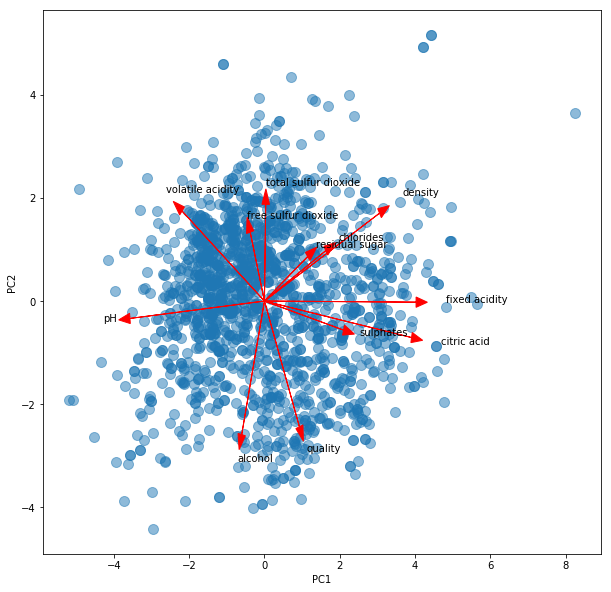

In [8]:
df_scores.plot.scatter(x='PC1',y='PC2',alpha=0.5,s=100,figsize=(10,10))
x_scale = df_scores['PC1'].abs().max()
y_scale = df_scores['PC2'].abs().max()
for k in range(df.shape[1]):
    x = x_scale*df_loadings.iloc[0,k]
    y = y_scale*df_loadings.iloc[1,k]
    plt.arrow(0,0,x,y,head_width=0.2,color='red')
    x=1.2*x
    y=1.2*y
    plt.text(x,y,df.columns[k],color='black')